# ABS preprocessing

This notebook aggregates the ABS data such that the relevant fields are extracted and the data is neatly formatted into a csv wherein the rows are associated with an SA2

In [284]:
import pandas as pd

In [285]:
# years we are dealing with
years = [(2021, "SAL_CODE_2021", "SAL", "Suburbs and Localities"), (2016, "SSC_CODE_2016", "SSC", "State Suburbs")]

# fields we want to extract and the file the data is in : 
# Creating the list of tuples with the shorthand name and G01 or G02 group.
fields_with_names = [
    ("Median_age_persons", "G02"),
    ("Median_mortgage_repay_monthly", "G02"),
    ("Median_tot_prsnl_inc_weekly", "G02"),
    ("Median_rent_weekly", "G02"),
    ("Median_tot_fam_inc_weekly", "G02"),
    ("Average_num_psns_per_bedroom", "G02"),
    ("Median_tot_hhd_inc_weekly", "G02"),
    ("Average_household_size", "G02"),
    ("Tot_P_P", "G01")
]


fields_with_names

[('Median_age_persons', 'G02'),
 ('Median_mortgage_repay_monthly', 'G02'),
 ('Median_tot_prsnl_inc_weekly', 'G02'),
 ('Median_rent_weekly', 'G02'),
 ('Median_tot_fam_inc_weekly', 'G02'),
 ('Average_num_psns_per_bedroom', 'G02'),
 ('Median_tot_hhd_inc_weekly', 'G02'),
 ('Average_household_size', 'G02'),
 ('Tot_P_P', 'G01')]

In [286]:
datasets = []

path = '../../data/landing/'

for year, code, tp, full_nm in years:
    # Create an empty DataFrame for each year to append data into
    yearly_df = pd.DataFrame()
    
    full_path = path + f"{year}_GCP_{tp}_for_VIC_short-header/{year} Census GCP {full_nm} for VIC/"

    for field, group in fields_with_names:
        # Construct the file path based on year and group
        file = f"{full_path}{year}Census_{group}_VIC_{tp}.csv"
        
        # Read the CSV into a pandas DataFrame
        pandas_df = pd.read_csv(file)
        
        # Filter to only keep the fields of interest (code and the specific field)
        pandas_df = pandas_df[[code, field]]
        
        # If the yearly_df is empty, initialize it with the code column
        if yearly_df.empty:
            yearly_df[code] = pandas_df[code]
        
        # Add the specific field to the yearly DataFrame
        yearly_df[field] = pandas_df[field]

    # Append the complete DataFrame for the year to the datasets list
    datasets.append(yearly_df)

datasets[1].head()

,SSC_CODE_2016,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,Tot_P_P
0,SSC20001,0,0,0,0,0,0.0,0,0.0,0
1,SSC20002,32,2142,1068,426,2459,1.1,2001,2.1,8184
2,SSC20003,40,2200,877,351,2602,0.9,2200,2.9,3897
3,SSC20004,0,0,0,0,0,0.0,0,0.0,0
4,SSC20005,57,1424,598,0,1406,0.7,1109,2.2,171


In [287]:
correspondance = pd.read_csv("../../data/landing/CG_SSC_2016_SAL_2021.csv")
correspondance = correspondance[["SSC_CODE_2016", "SAL_CODE_2021"]]

correspondance

correspondance['SSC_CODE_2016'] = correspondance['SSC_CODE_2016'].apply(lambda x: str(int(x)) if not pd.isnull(x) else '')
correspondance

,SSC_CODE_2016,SAL_CODE_2021
0,10001,10001
1,10002,10002
2,10003,10003
3,10004,10004
4,10005,10005
...,...,...
15751,90005,90005
15752,99494,99494
15753,99797,99797
15754,,51265


In [288]:
# Convert SSC_CODE_2016 to string, remove the '.0' by converting to integer first if applicable


# Check the result
print(correspondance.head())


datasets[1]['SSC_CODE_2016'] = datasets[1]['SSC_CODE_2016'].str.replace('SSC', '')
datasets[0]['SAL_CODE_2021'] = datasets[0]['SAL_CODE_2021'].str.replace('SAL', '')

datasets[1]

  SSC_CODE_2016 SAL_CODE_2021
0         10001         10001
1         10002         10002
2         10003         10003
3         10004         10004
4         10005         10005


,SSC_CODE_2016,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,Tot_P_P
0,20001,0,0,0,0,0,0.0,0,0.0,0
1,20002,32,2142,1068,426,2459,1.1,2001,2.1,8184
2,20003,40,2200,877,351,2602,0.9,2200,2.9,3897
3,20004,0,0,0,0,0,0.0,0,0.0,0
4,20005,57,1424,598,0,1406,0.7,1109,2.2,171
...,...,...,...,...,...,...,...,...,...,...
2926,22927,58,0,518,0,1125,1.0,900,1.6,37
2927,22928,45,1375,588,230,1792,0.8,1357,2.5,149
2928,22929,0,0,0,0,0,0.0,0,0.0,0
2929,29494,34,0,398,0,0,0.0,0,0.0,7565


In [289]:
# Merge the data DataFrame with the correspondance DataFrame on the 'SSC_CODE_2016' column

datasets[1] = datasets[1].merge(correspondance[['SSC_CODE_2016', 'SAL_CODE_2021']], on='SSC_CODE_2016', how='left')

# drop the SSC_CODE_2016 column
datasets[1] = datasets[1].drop(columns=['SSC_CODE_2016'])

# make the SAL_CODE_2021 the first column
datasets[1] = datasets[1][['SAL_CODE_2021'] + [col for col in datasets[1].columns if col != 'SAL_CODE_2021']]

In [290]:
datasets[1]

,SAL_CODE_2021,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,Tot_P_P
0,20001,0,0,0,0,0,0.0,0,0.0,0
1,20002,32,2142,1068,426,2459,1.1,2001,2.1,8184
2,20003,40,2200,877,351,2602,0.9,2200,2.9,3897
3,20004,0,0,0,0,0,0.0,0,0.0,0
4,20005,57,1424,598,0,1406,0.7,1109,2.2,171
...,...,...,...,...,...,...,...,...,...,...
2993,22942,58,0,518,0,1125,1.0,900,1.6,37
2994,22943,45,1375,588,230,1792,0.8,1357,2.5,149
2995,22944,0,0,0,0,0,0.0,0,0.0,0
2996,29494,34,0,398,0,0,0.0,0,0.0,7565


In [291]:
# Filter datasets to get suburbs with population less than 50
filtered_datasets = [dataset[dataset["Tot_P_P"] < 800] for dataset in datasets]

# Extract SAL_CODE from the filtered datasets
sal_codes = [dataset["SAL_CODE_2021"] for dataset in filtered_datasets]

# Combine all SAL_CODEs into a single list
all_sal_codes = pd.concat(sal_codes).unique()


print(all_sal_codes.shape)

all_sal_codes.shape

# Save the list of all SAL_CODEs to a CSV file
pd.DataFrame(all_sal_codes, columns=['SAL_CODE']).to_csv(f"../../data/landing/filtered_sal_codes.csv", index=False)



(2220,)


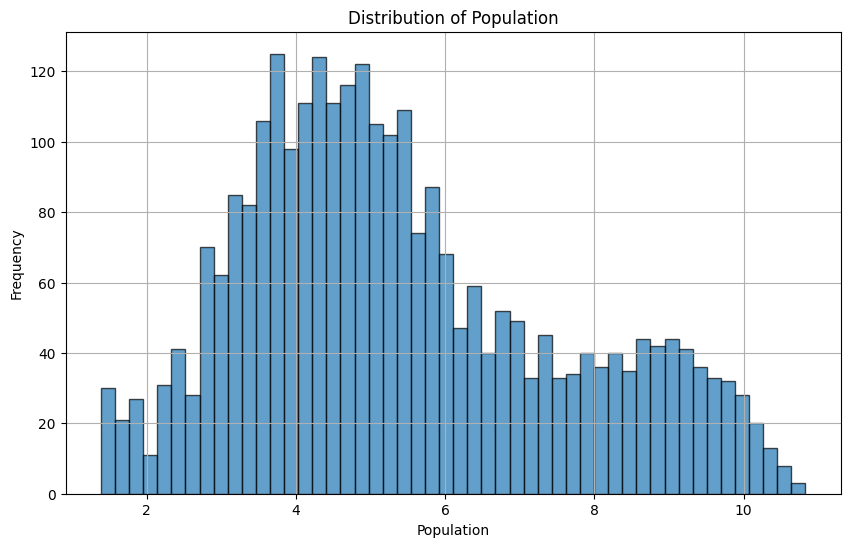

In [292]:
import numpy as np



pop = dataset[["Tot_P_P"]]

pop = pop[pop['Tot_P_P'] > 0]

pop['log_Tot_P_P'] = np.log(pop['Tot_P_P'] + 1)
import matplotlib.pyplot as plt

# Visualize the distribution of population
plt.figure(figsize=(10, 6))
plt.hist(pop['log_Tot_P_P'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




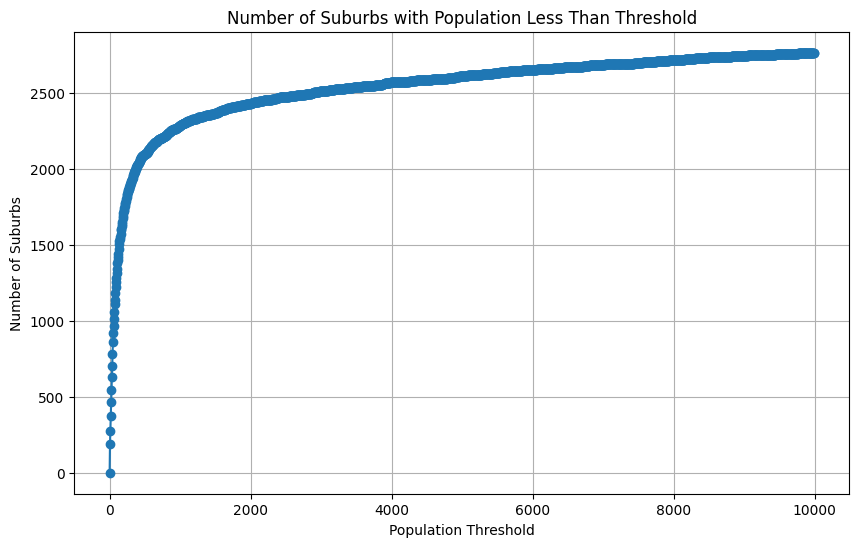

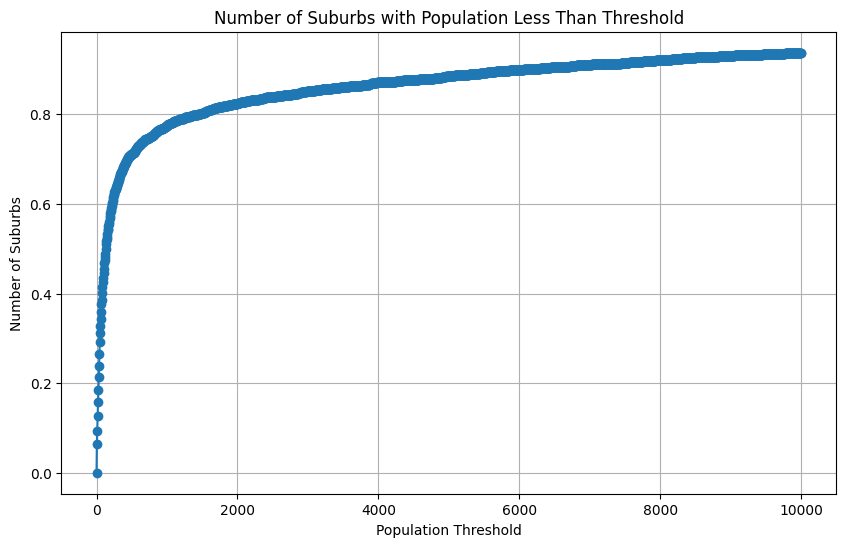

In [294]:
d = {}

for i in range(0,10000,5):
    # Filter datasets to get suburbs with population less than 50
    filtered_datasets = [dataset[dataset["Tot_P_P"] < i] for dataset in datasets]
    
    # Extract SAL_CODE from the filtered datasets
    sal_codes = [dataset["SAL_CODE_2021"] for dataset in filtered_datasets]

    # Combine all SAL_CODEs into a single list
    all_sal_codes = pd.concat(sal_codes).unique()

    d[i] = all_sal_codes.shape[0]

import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(list(d.keys()), list(d.values()), marker='o')
plt.title('Number of Suburbs with Population Less Than Threshold')
plt.xlabel('Population Threshold')
plt.ylabel('Number of Suburbs')
plt.grid(True)
plt.show()

prop = {k: v / dataset.shape[0] for k, v in d.items()}


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(list(prop.keys()), list(prop.values()), marker='o')
plt.title('Number of Suburbs with Population Less Than Threshold')
plt.xlabel('Population Threshold')
plt.ylabel('Number of Suburbs')
plt.grid(True)
plt.show()




In [295]:

# drop tot_p_p
datasets[0] = datasets[0].drop(columns=['Tot_P_P'])

In [296]:
# if there are duplicates, take the mean of the values
datasets[1] = datasets[1].groupby('SAL_CODE_2021', as_index=False).mean()

# still retain SAL_CODE

In [297]:
datasets[1]

,SAL_CODE_2021,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,Tot_P_P
0,20001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20002,32.0,2142.0,1068.0,426.0,2459.0,1.1,2001.0,2.1,8184.0
2,20003,40.0,2200.0,877.0,351.0,2602.0,0.9,2200.0,2.9,3897.0
3,20004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20005,57.0,1424.0,598.0,0.0,1406.0,0.7,1109.0,2.2,171.0
...,...,...,...,...,...,...,...,...,...,...
2941,22942,58.0,0.0,518.0,0.0,1125.0,1.0,900.0,1.6,37.0
2942,22943,45.0,1375.0,588.0,230.0,1792.0,0.8,1357.0,2.5,149.0
2943,22944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2944,29494,34.0,0.0,398.0,0.0,0.0,0.0,0.0,0.0,7565.0


In [298]:
# standardise the first column name
for dataset in datasets:
    dataset.rename(columns={dataset.columns[0]: "SAL_CODE"}, inplace=True)

In [299]:
# export the files

export_path = '../../data/curated/'

for i,dataset in enumerate(datasets):
    dataset.to_csv(f"{export_path}ABS_data_{years[i][0]}.csv", index=False)

In [300]:
datasets[0].head()

,SAL_CODE,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size
0,20001,63,0,2250,0,0,1.0,900,1.0
1,20002,33,2167,1354,425,3024,1.0,2197,1.9
2,20003,41,2600,1053,440,3172,0.8,2571,2.8
3,20004,46,0,949,0,2124,1.2,1375,2.0
4,20005,56,1606,783,271,2107,0.7,1478,2.3
